In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import matplotlib as mpl
import pandas as pd

In [47]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)

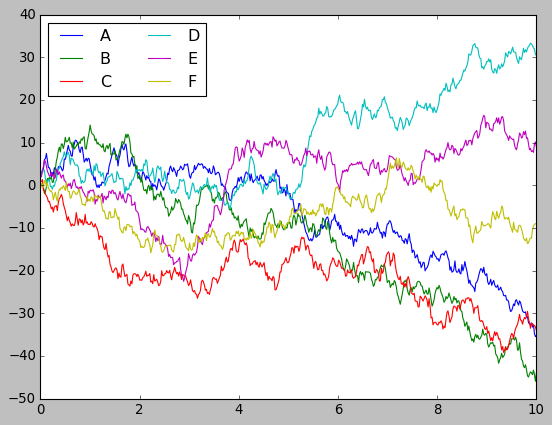

In [48]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [49]:
import seaborn as sns
sns.set()

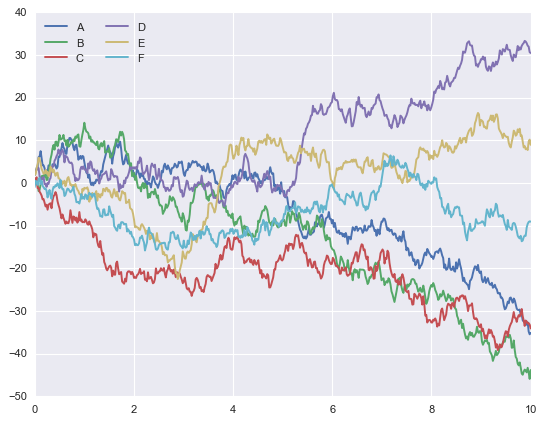

In [50]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

시본 플롯 탐색하기 => 히스토그램, KDE등 결합분포(joint distribution) 그리기

In [51]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,2.084558,1.175637
1,3.461546,1.467010
2,6.094057,1.271236
3,3.188659,-0.013629
4,0.256097,-1.078121


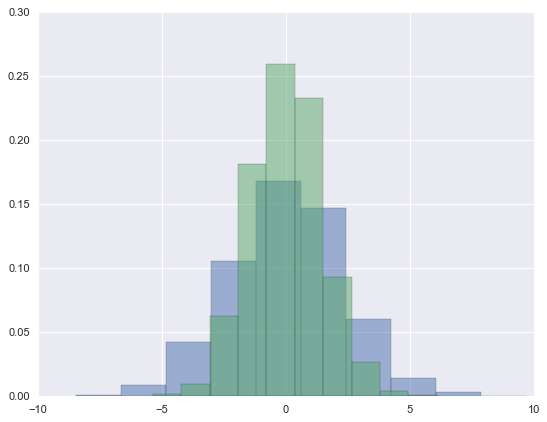

In [52]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

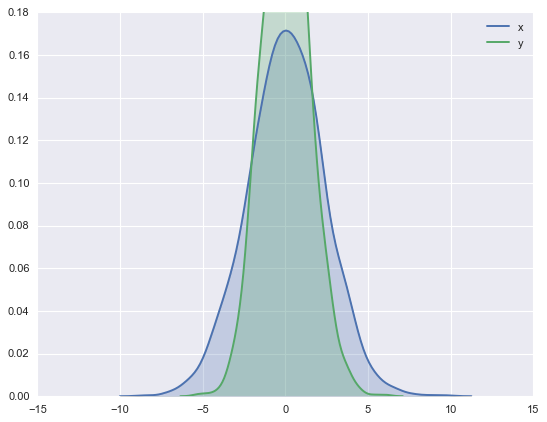

In [53]:
#평할 밀도 추정하기

for col in 'xy':
    sns.kdeplot(data[col], shade=True);

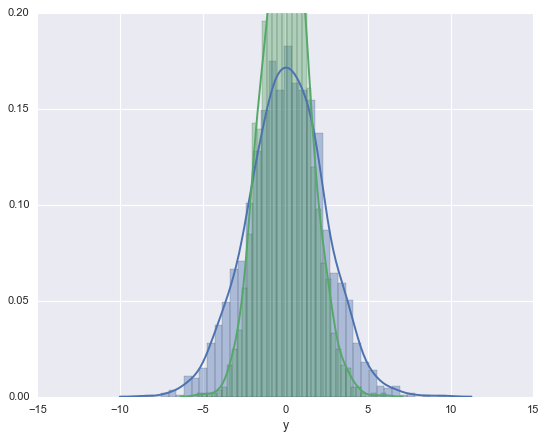

In [54]:
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\Users\jsong\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


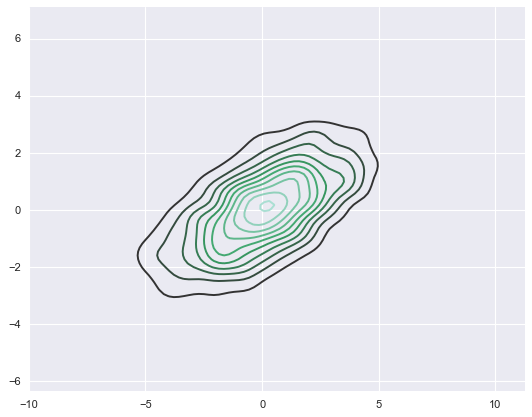

In [55]:
sns.kdeplot(data);

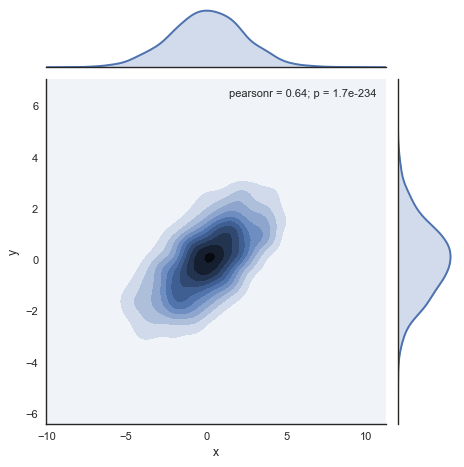

In [56]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')

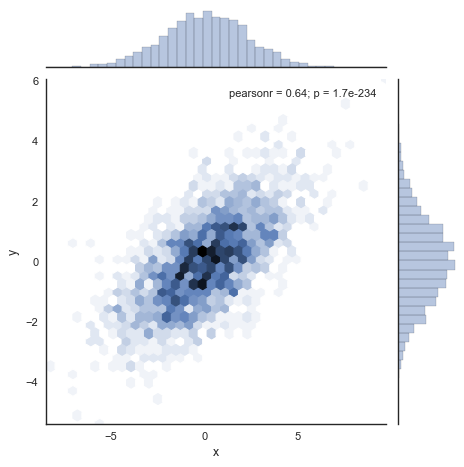

In [57]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [58]:
#페어플롯 => 상관관계 파악에매우 유용함

iris = sns.load_dataset("iris")
iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


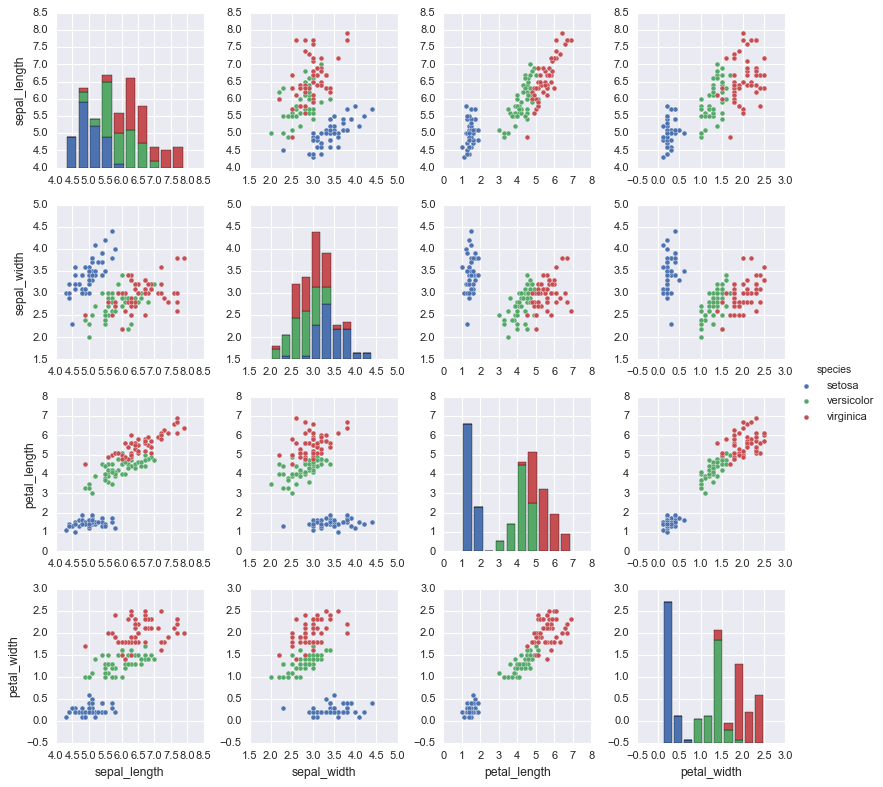

In [59]:
sns.pairplot(iris, hue='species', size=2.5);

In [60]:
# FacetGrid를 통한 부분 집합 히스토그램 만들기

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tips['tip_pct'] = 100*tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


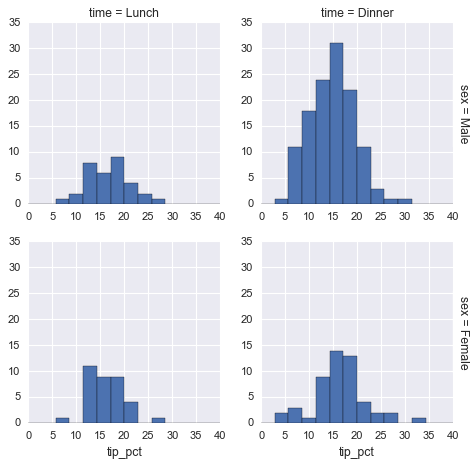

In [62]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40,15));

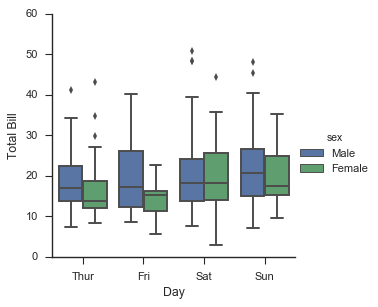

In [63]:
# Factor Plot 

with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill');

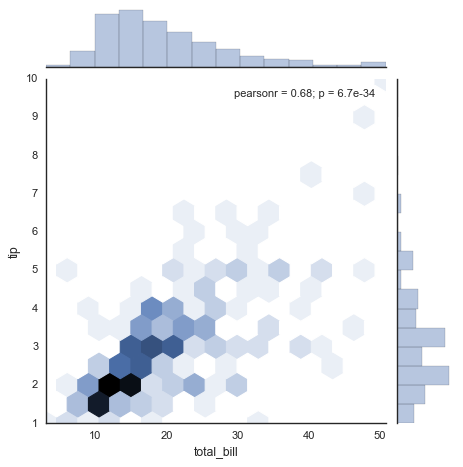

In [64]:
# Joint Distribution

with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex');

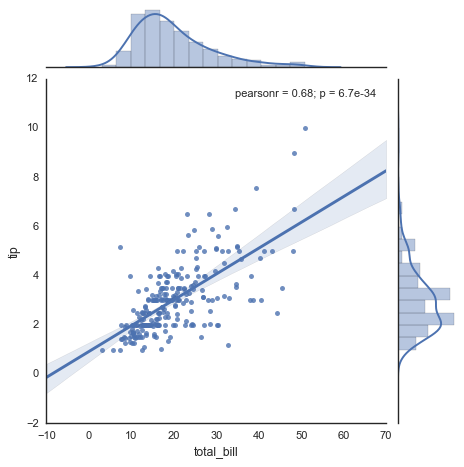

In [65]:
#회귀 분석

with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='reg');

In [66]:
# FactorPlot을 이용한 시계열 분석

planets= sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


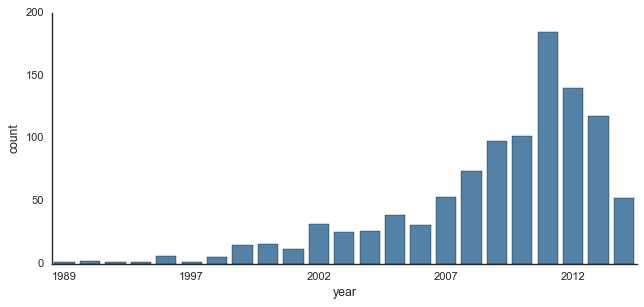

In [67]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2,
                     kind='count', color='steelblue')
    g.set_xticklabels(step=5)

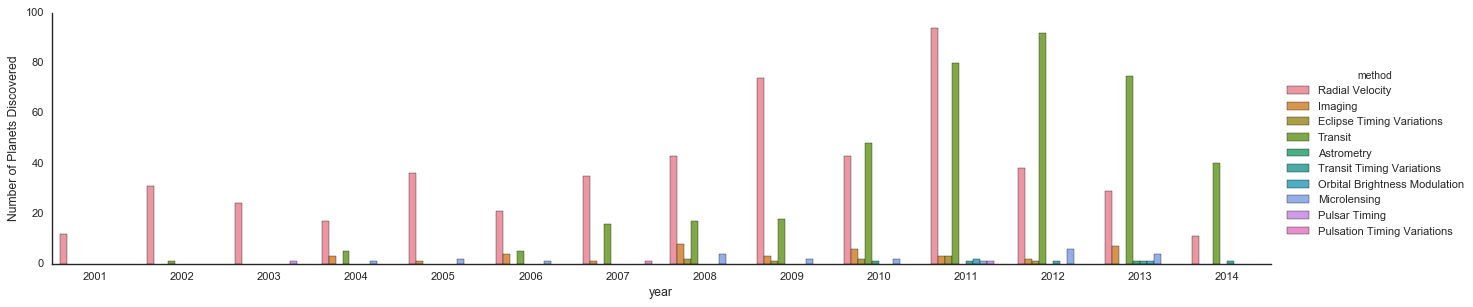

In [68]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4.0,
                     kind='count', hue='method', order=range(2001,2015))
    g.set_ylabels('Number of Planets Discovered');

예제: 마라톤 완주 시간 탐색

In [69]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [70]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [71]:
# split과 final이 object로 되어있어 분석이 안되니 시간 데이터 변환기로 timedelta로 데이터를 전환

from datetime import timedelta
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                  converters={'split': convert_time, 'final': convert_time})
data.head()

NameError: name 'datetime' is not defined